**Cuaderno de Programacion - Introducción Práctica a la Visualización**<br>
Este cuaderno es para el Curso de Gestión de la Información - Big Data<br>
Profesor - Jack Raifer Baruch

Para iniciar con las visualizaciones, lo primero que debemos de hacer es importar las librerías que necesitamos para realizar las visualizaciones.<br>
En este caso las librerías que necesitamos son:<br>
**Pandas** - Librería de Gestión de Marcos de Datos (Dataframes) para python. La importamos como "pd" por facilidad de programación.<br>
**Pyplot** - de la librería de Matplotlib descargamos la sublibrería pyplot que nos permite hacer los gráficos necesarios. La importamos como "plt" por facilidad de programación.<br>
**Seaborn** - Librería adicional gráfica para utilizar con Matplotlib. La importamos como "sns" por facilidad de programación.<br>
Finalmente, utilizamos la llamada Jupyter Magic, para que los gráficos se despliegen directamente sobre el cuaderno de programación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

El siguiente paso, es cargar los datos que deseamos analizar en un cuadro de datos (dataframe). De esta manera podremos empezar a ver los datos y analizar cuales son las visualizaciones que deseamos desarrollar.

In [3]:
datos = pd.read_csv('bienes_raices_ejercicio.csv')

Como podemos ver, utilizamos un método llamado “read_csv”, que nos lee un archivo separado por comas, un formato muy común parecido y compatible con Excel, juntamente con la ubicación del archivo, en este caso solo su nombre, y lo colocamos en una variable llamada “datos”.<br>
Antes de proseguir, es importante que veamos al menos un poco de la información en nuestro marco de datos, por lo que utilizaremos otro método de la librería de pandas llamado “head”, que nos permite ver n cantidad de hileras de información, según lo que le indiquemos. En este caso, observemos unas 10 hileras.

In [4]:
datos.head(10)

,CUARTOS,BANOS,METROS,LOTE,PRECIO,PRECIO_CONST,PRECIO_TERRENO
0,4.0,2.0,337.517071,912.866154,291973.0,218982.0,72991.0
1,5.0,4.0,266.167467,463.586618,818739.0,267623.0,551116.0
2,2.0,2.0,101.264412,3739.072269,352198.0,229399.0,122799.0
3,3.0,4.0,150.503070,NaN,835036.0,334432.0,500604.0
4,3.0,2.0,192.959801,602.941313,637046.0,207035.0,430011.0
5,3.0,3.0,187.571419,628.303868,1410000.0,445000.0,965000.0
6,2.0,3.0,254.090060,NaN,2878212.0,746203.0,2132009.0
7,4.0,2.0,179.395944,503.534964,221244.0,122915.0,98329.0
8,4.0,4.0,286.699059,1193.154897,993913.0,338167.0,655746.0
9,3.0,3.0,201.228179,2050.650786,659000.0,363000.0,296000.0


Aquí observamos las primeras 10 hileras de datos (de 552000), y podemos ver claramente cuales son las columnas que tenemos disponibles:<br>
**Cuartos**: La cantidad de cuartos que hay en la propiedad.<br>
**Baños**: La cantidad de baños que hay en la propiedad. Pueden ser baños completos o parciales. El set de datos original tiene una serie de columnas para definir la cantidad de baños de cada tipo.<br>
**Metros**: El tamaño de la construcción en metros cuadrados.<br>
**Lote**: El tamaño del terreno en metros cuadrados.<br>
**Precio**: El precio total de la propiedad.<br>
**Precio de la Construcción**: El precio actual de la propiedad construida.<br>
**Precio del Terreno**: El precio actual del terreno en sí.<br>
Vemos en algunos casos que la información en el set de datos dice “NaN”, esto significa Not a Number en inglés, o no es un número. Normalmente quiere decir que la información no está disponible o el sistema no la puede leer. En el caso de este set de datos es que la información no está disponible. Hay diferentes formas de lidiar con esta falta de información, pero es un tema fuera del alcance de este curso. En este momento, la información faltante no nos afectará en nuestro trabajo de análisis visual.<br>
<br>
Empecemos por la cantidad de cuartos a ver que descubrimos. Para realizar esta visualización vamos primero a definir el tamaño de la figura y crear una variable llamada “bar_plot_data”, donde pondremos únicamente la información de la cantidad de cuartos, separada por las cuentas de cuantas casas hay con una cantidad específica. Luego le agregamos un título, así como nombrar las variables X (número de cuartos) y Y (cantidad de casas). Finalmente llamamos el comando “plt.show()” para crear la visualización:


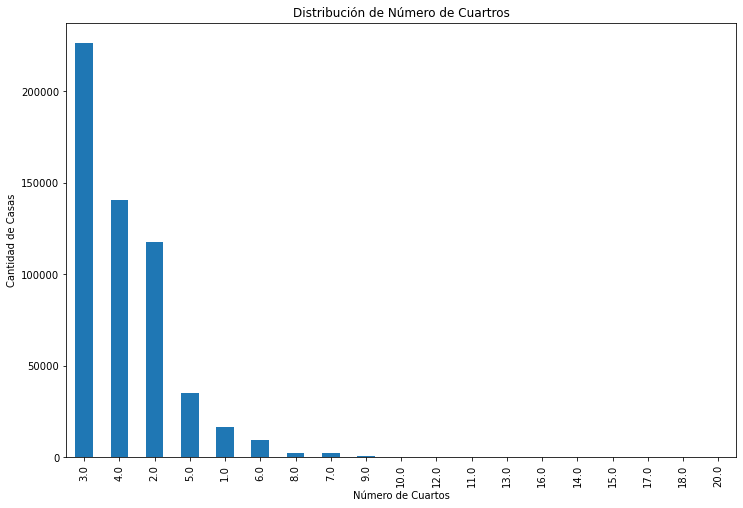

In [18]:
fig = plt.figure(figsize=(12, 8))
bar_plot_data = datos['CUARTOS'].value_counts()
plt.title("Distribución de Número de Cuartros")
plt.xlabel("Número de Cuartos")
plt.ylabel("Cantidad de Casas")
bar_plot_data.plot.bar()
plt.show()

Por defecto, el sistema colocará primero la barra de lo más frecuente, en este caso, casas de 3 habitaciones, que como podemos ver son aproximadamente la mitad de nuestras 552,000 casas, seguidas de casas de 4 habitaciones, luego 2, luego 5 y después 1. De esta manera ya podemos empezar a ver información interesante, aparentemente 3 habitaciones es el tipo de casa más común y las casa con 6 o más habitaciones son cada vez más pocas e inusuales.<br>
Veamos si encontramos algo similar con el tema de los baños.<br>
Veamos si encontramos algo similar con el tema de los baños. Empezamos con un código similar al de la vez pasada, solo que en vez de utilizar la columna de CUARTOS utilizaremos la columna denominada BANOS:


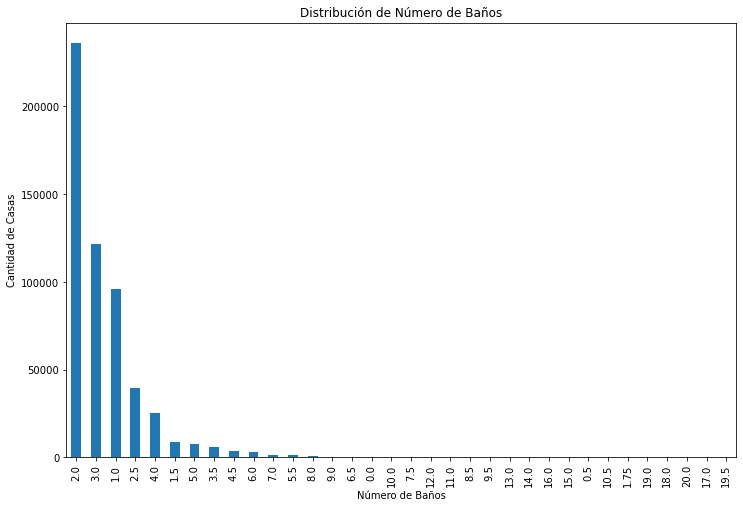

In [19]:
fig = plt.figure(figsize=(12, 8))
bar_plot_data = datos['BANOS'].value_counts()
plt.title("Distribución de Número de Baños")
plt.xlabel("Número de Baños")
plt.ylabel("Cantidad de Casas")
bar_plot_data.plot.bar()
plt.show()

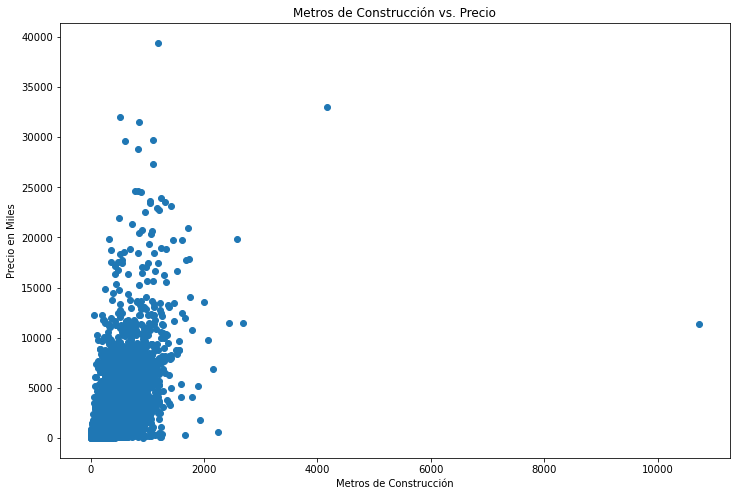

In [35]:
fig = plt.figure(figsize=(12, 8))
plt.title("Metros de Construcción vs. Precio")
plt.xlabel("Metros de Construcción")
plt.ylabel("Precio en Miles")
plt.scatter(datos['METROS'], datos['PRECIO']/1000)
plt.show()

Podemos observar que sí parece haber una relación positiva entre el tamaño de la propiedad y su precio, aunque no siempre es tan lineal como lo podemos esperar. También encontramos que una propiedad de más de 10,000 metros está opacando nuestra visibilidad, tal vez si removemos esa excepción podríamos ver más claramente la relación entre estas dos variables.<br>
Pero por el momento, concentrémonos en ver la siguiente relación, entre el precio de la propiedad y los metros cuadrados de lote en el que esta se encuentra. Aquí la única diferencia es que cambiamos la variable “METROS” por “LOTE” y luego alteramos nuestro título y etiquetas:



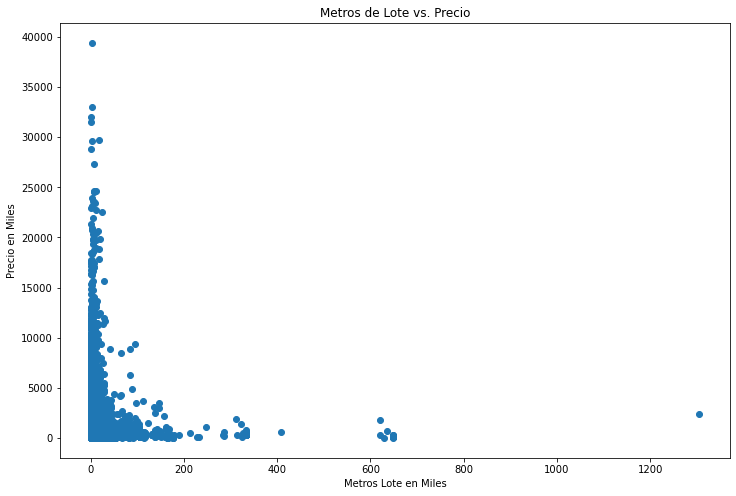

In [38]:
fig = plt.figure(figsize=(12, 8))
plt.title("Metros de Lote vs. Precio")
plt.xlabel("Metros Lote en Miles")
plt.ylabel("Precio en Miles")
plt.scatter(datos['LOTE'] / 1000, datos['PRECIO']/1000)
plt.show()

Aquí vemos un poco menos de correlación entre las variables, y nuevamente nos encontramos con que unos valores extremos nos dificultan la posibilidad de ver claramente los puntos donde se encuentra la mayor parte de la información. Esto puede ser algo interesante de investigar más a fondo, en especial si removemos los datos extremos que no parece en este momento brindarnos información interesante.<br>
Eliminaremos algunos datos en las próximas visualizaciones para descubrir información más interesante. Iniciemos realizando un Gráfico de Caja de los precios, eliminando todas aquellas propiedades con precios mayores a un millón de dólares.<br>
Para ello vamos a nuevamente cambiar de estrategia. Esta vez, utilizaremos la librería Seaborn. Vamos a utilizar una técnica fabulosa de Python que se llama la comprensión de listas , en el que le explicamos con detalle que queremos visualizar en gráfico de caja todos los puntos de precio de las casas, siempre y cuando estos sean menores o iguales a un millón. Por la escala que se utilizará, definiremos los precios en millones de dólares.


C:\Users\jraif\anaconda3\envs\Programming\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribucion de Precios'}, xlabel='Precio en Millones de Dólares'>

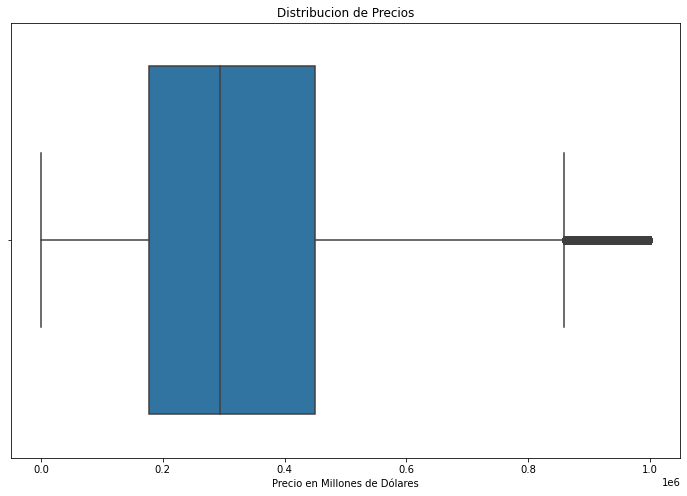

In [59]:
fig = plt.figure(figsize=(12, 8))
plt.title("Distribucion de Precios")
plt.xlabel("Precio en Millones de Dólares")
sns.boxplot([x for x in datos['PRECIO'] if x <= 1000000])

Ya que eliminamos la mayoría de los puntos extremos, podemos ver ya más información interesante de la distribución de precios, como, por ejemplo, que el precio promedio está cerca de los 300,000 dólares, y que la gran mayoría de las propiedades se ubican entre los 200,000 y los 430,000 aproximadamente. También vemos que las propiedades arriba de unos 850,000 dólares son consideradas extremas. Ya en este caso logramos acercarnos más a los datos, y la gran ventaja de un gráfico de caja, es que nos permite descubrir mucha información en un solo lugar. Pero todavía tenemos una visualización más poderosa que nos podría dar aún más información de la distribución de precios, el gráfico de violín.<br>
Para llevar este a cabo, únicamente tenemos que cambiar el tipo de gráfico y lo demás queda exactamente igual:


C:\Users\jraif\anaconda3\envs\Programming\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribucion de Precios'}, xlabel='Precio en Millones de Dólares'>

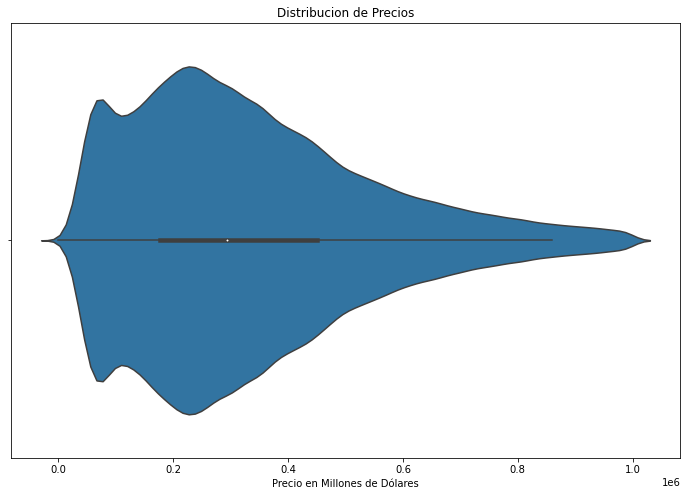

In [60]:
fig = plt.figure(figsize=(12, 8))
plt.title("Distribucion de Precios")
plt.xlabel("Precio en Millones de Dólares")
sns.violinplot([x for x in datos['PRECIO'] if x <= 1000000])

Esta visualización nos da una cantidad exorbitante de información. Nuevamente podemos ver el promedio, así como el rango Inter cuartil, pero ahora vemos con toda la claridad la distribución. Inclusive, ahora podemos ver como el promedio está más arriba de media, y vemos como hay una distribución interesante alrededor de los 100,000 dólares. También vemos como hay una increíble constancia decreciente en la cantidad de casas una vez que superamos unos 230,000 dólares.<br>
Con toda esta información, de un set de datos bastante limitado, podemos empezar a descubrir información interesante. Pero nos falta un paso más en nuestro análisis a través de las visualizaciones, encontrar los niveles de correlación entre las variables que tenemos disponibles. Ya que nos encontramos con un problema en los gráficos de dispersión, y puesto que contamos con otra herramienta que puede ser más interesante y poderosa para lo que buscamos lograr, vamos entonces a pasar a crear un mapa de calor de las correlaciones entre las variables que tenemos.<br>
Pero primero, para tener los datos más claros, podemos también crear una versión previa que se llama una tabla de correlaciones. Aquí es donde brilla el poder de herramientas como Pandas en Python, simplemente le pedimos directamente a Pandas, que nos cree una tabla de correlaciones utilizando el comando “datos.corr()” y listo, tenemos lo siguiente:


In [47]:
datos.corr()

,CUARTOS,BANOS,METROS,LOTE,PRECIO,PRECIO_CONST,PRECIO_TERRENO
CUARTOS,1.000000,0.630822,0.635366,-0.087649,0.231619,0.303114,0.163225
BANOS,0.630822,1.000000,0.793253,0.018356,0.479593,0.592430,0.356794
METROS,0.635366,0.793253,1.000000,-0.020183,0.597751,0.711411,0.459137
LOTE,-0.087649,0.018356,-0.020183,1.000000,0.002901,0.025930,-0.009703
PRECIO,0.231619,0.479593,0.597751,0.002901,1.000000,0.837605,0.956443
PRECIO_CONST,0.303114,0.592430,0.711411,0.025930,0.837605,1.000000,0.641653
PRECIO_TERRENO,0.163225,0.356794,0.459137,-0.009703,0.956443,0.641653,1.000000


La tabla es simple, todos los números que vemos son entre -1 y 1. Números cercanos a 0 indican que no existe ninguna correlación (matemáticamente hablando), mientras el número se acerca más hacia 1, implica cada vez más una correlación positiva más fuerte, en otras palabras, mientras más aumenta una de las variables, más aumenta la otra. Por el otro lado, cuando se acerca a -1, implica una correlación negativa más fuerte, en otras palabras, mientras más aumenta una variable, la otra disminuye. <br>
Con ver la tabla por unos instantes, vemos como existe una clara correlación positiva entre los metros de una propiedad y su precio (0.59). Pero también encontramos cosas interesantes e inesperadas, como que la cantidad de baños tiene una correlación más fuerte con el precio (0.47) que la cantidad de cuartos (0.23). ¿Será acaso que consideramos los baños más importantes que los cuartos?<br>
Para finalizar, vamos a hacer nuestra última visualización, un mapa de calor de correlaciones, para encontrar así lo mismo que en la tabla de arriba, pero de manera visual mucho más fácil de comunicar. <br>
Nuevamente, las librerías de Pandas y Seaborn nos ayudan a crear esto con facilidad, utilizando unas pocas líneas de código:


<AxesSubplot:>

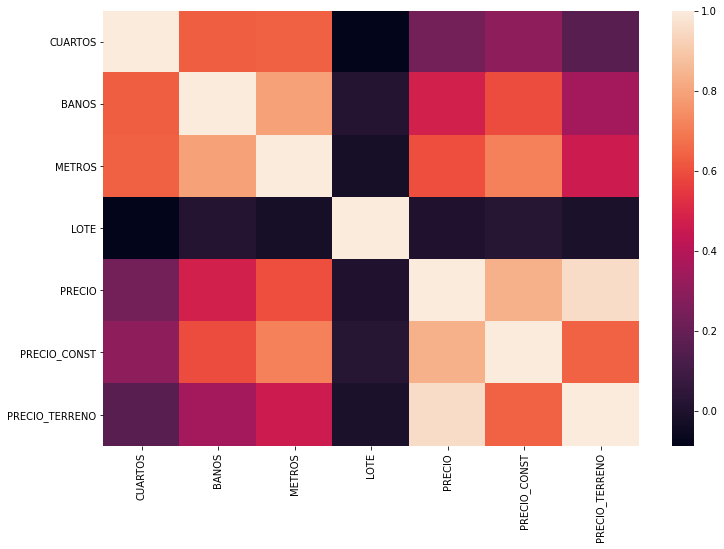

In [49]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(datos.corr())

Y aquí tenemos el mapa de calor, con los colores más claros implicando una correlación positiva y los más oscuros una correlación negativa (también se pueden cambiar a gusto los colores de las visualizaciones, incluyendo este mapa de calor, pero eso está fuera del alcance de este curso).<br>
Si les interesan estos temas, les recomiendo busquen tutoriales de Python, Visualización, Matplotlib, Pandas y similares. Pueden encontrar todo lo que necesitan para aprender a programar en el canal de Freecodecamp en Youtube: https://www.youtube.com/c/Freecodecamp. 


Jupyter Notebook creado por Jack Raifer Baruch para el curso de Gestión de la Información Big Data, Universidad Aden, 2021.